<B>1. Perceptron <B> implementation for classification on Iris dataset for binary classification

In [1]:
import numpy as np
import os
import pandas as pd

In [2]:

class Perceptron:
    """Perceptron classifier """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):

      """Fit training data.
        Parameters
        ---------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of
          examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.
        Returns
        ------
        self : object
        """
      rgen = np.random.RandomState(self.random_state)
      self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=X.shape[1])
      self.b_ = np.float_(0.)
      self.errors_ = []
      for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
      return self

    def net_input(self, X):
      """Calculate net input"""
      return np.dot(X, self.w_) + self.b_
    def predict(self, X):
      """Return class label after unit step"""
      return np.where(self.net_input(X) >= 0.0, 1, 0)

In [3]:
s = 'https://archive.ics.uci.edu/ml/'\
    'machine-learning-databases/iris/iris.data'
print('From URL:', s)

df = pd.read_csv(s,
                header=None,
                 encoding='utf-8')
df.tail()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
import matplotlib.pyplot as plt
import numpy as np
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

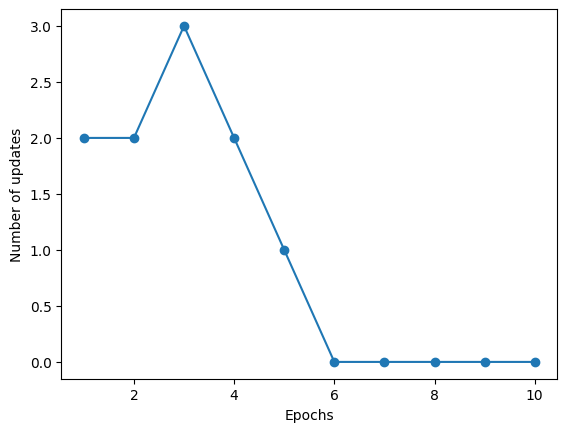

In [5]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

**2. Implement Linear(dense) Layer with Relu activation with corresponding forward and backward pass**

In [6]:
import numpy as np

In [7]:
# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


In [8]:
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0

In [9]:
dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()


In [10]:
rgen = np.random.RandomState(42)
x = rgen.normal(loc=0.0, scale=0.01,size=(100,2))

In [11]:
dense1.forward(x)
activation1.forward(dense1.output)

In [12]:
print(activation1.output)

[[0.00000000e+00 2.57085270e-05 0.00000000e+00 ... 2.42953224e-06
  1.14806159e-05 3.92356538e-05]
 [0.00000000e+00 8.23530624e-05 0.00000000e+00 ... 2.35363259e-04
  0.00000000e+00 0.00000000e+00]
 [1.86533738e-05 0.00000000e+00 2.14890726e-05 ... 0.00000000e+00
  2.54280213e-06 7.06355064e-06]
 ...
 [0.00000000e+00 2.13915564e-05 0.00000000e+00 ... 5.99447095e-05
  0.00000000e+00 0.00000000e+00]
 [8.87183945e-05 0.00000000e+00 8.56631953e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.12911558e-05 1.00815914e-04]]


In [13]:
backward_input = rgen.normal(loc=0.0, scale=0.01,size=(100,64))

In [14]:
activation1.backward(backward_input)
dense1.backward(activation1.dinputs)

In [15]:
print(dense1.dinputs)

[[-2.21975807e-04 -8.98034205e-05]
 [-1.00495772e-03 -2.53262050e-04]
 [ 5.50631298e-04  2.40375677e-04]
 [ 7.36405351e-04  4.37654768e-04]
 [-7.61711985e-04 -6.76979955e-04]
 [ 9.80961427e-04 -3.42811023e-04]
 [-3.52855028e-04  2.54006719e-05]
 [ 8.60664252e-04  2.14917781e-05]
 [-6.35792270e-04  5.95772631e-05]
 [ 3.35408327e-05  4.90747636e-04]
 [ 1.20360366e-03 -8.81568847e-04]
 [ 4.27852079e-04 -6.61745121e-04]
 [ 5.29674511e-04 -8.19412265e-04]
 [ 4.32844527e-04  3.05439379e-04]
 [ 3.11062523e-04 -2.49390623e-04]
 [ 9.45494850e-04 -4.75837212e-04]
 [-4.88483832e-04 -8.56915269e-04]
 [ 1.26033546e-04 -5.15722833e-05]
 [ 1.47279609e-04  3.11613198e-04]
 [ 4.24852889e-05 -1.87671084e-05]
 [ 5.39433098e-04 -3.68789762e-04]
 [ 5.10905809e-04 -9.40246471e-04]
 [-7.62472301e-07 -3.57555587e-04]
 [-1.11725553e-03  3.60584376e-04]
 [-2.41570409e-04 -3.02969220e-07]
 [-4.61885980e-04  1.02714676e-04]
 [-5.47262014e-05 -3.51811942e-05]
 [-3.34768983e-04  3.80536010e-04]
 [ 5.09257201e-04  1

3. Implemmentation of softmax activation in numpy

In [16]:
# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities

    # Backward pass
    def backward(self, dvalues):

        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)

        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in \
                enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output
            jacobian_matrix = np.diagflat(single_output) - \
                              np.dot(single_output, single_output.T)
            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix,
                                         single_dvalues)

In [17]:
activation = Activation_Softmax()

In [18]:
softmax_input = rgen.randn(100,5)

In [19]:
print(softmax_input)

[[-1.28948059e+00  5.84494807e-02  9.12620323e-01  4.21716933e-01
  -5.96543120e-02]
 [-1.70166586e+00 -8.09724836e-01  1.87800338e-01 -7.87174070e-01
   2.03359460e-01]
 [ 6.81743409e-01  9.62502886e-01 -1.22617936e+00  2.19664605e+00
   7.67479345e-01]
 [-1.71415367e-03  1.08953658e+00  2.36540777e+00 -1.43872010e+00
  -2.25262642e-01]
 [-2.37843166e+00  1.92651533e-01  3.65394242e-01 -3.91621154e-02
  -6.54533571e-01]
 [-2.04951452e+00  3.73533683e-01  1.45543448e+00 -5.91018456e-01
   4.40059929e-01]
 [-1.56814431e+00  4.57213064e-01 -3.93382298e-01 -7.62417951e-01
  -7.60363641e-01]
 [-3.93611582e-01  3.82433316e-01 -1.31216320e+00 -3.97115332e-01
  -4.14717780e-02]
 [-1.09903922e+00  1.79666520e+00 -8.53495480e-01 -6.69436914e-01
  -9.78307950e-01]
 [ 1.79848009e+00  5.52905229e-01 -9.36592006e-01  1.10623156e+00
   2.00698694e-01]
 [ 2.57253421e-01 -3.44477209e-01 -7.49415987e-01  3.37766099e-01
  -5.45087230e-01]
 [ 1.81675563e+00 -1.26929111e+00  1.53615677e+00 -1.11318849e-01

In [20]:
activation.forward(softmax_input)

In [21]:
print(activation.output)

[[0.04376432 0.16846852 0.39580423 0.24226117 0.14970177]
 [0.05189203 0.12660934 0.34330918 0.12949691 0.34869254]
 [0.12328905 0.16325136 0.01829465 0.56083922 0.13432571]
 [0.06376754 0.18989951 0.68018596 0.0151536  0.05099338]
 [0.02192678 0.28680195 0.3408814  0.22746088 0.12292898]
 [0.01615103 0.18218666 0.53750206 0.06944115 0.1947191 ]
 [0.06135934 0.46503132 0.19864303 0.13734194 0.13762437]
 [0.16692909 0.36271376 0.06662084 0.16634523 0.23739108]
 [0.04340367 0.78544335 0.05548361 0.06669608 0.0489733 ]
 [0.48650928 0.14000542 0.03156926 0.24347334 0.09844269]
 [0.29024056 0.15901197 0.10606379 0.31457508 0.1301086 ]
 [0.46175225 0.02109385 0.34877591 0.06715168 0.1012263 ]
 [0.39942493 0.09244545 0.41203836 0.01158052 0.08451073]
 [0.07971839 0.05734336 0.16200193 0.29539488 0.40554144]
 [0.18400494 0.07432091 0.20916059 0.16375503 0.36875853]
 [0.4616417  0.21883735 0.08653936 0.11048748 0.12249411]
 [0.12063457 0.21617379 0.33805433 0.15710487 0.16803244]
 [0.40935817 0

In [22]:
sum_dim1 = np.sum(activation.output, axis=1)
print(sum_dim1)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [23]:
activation.backward(rgen.randn(100,5))

In [24]:
print(activation.dinputs)

[[-1.10374957e-02 -2.68862149e-02  2.78885545e-02 -7.99416323e-02
   8.99767885e-02]
 [ 5.81038338e-03 -1.81730442e-01  1.20240252e-01 -2.41884327e-01
   2.97564134e-01]
 [-6.40771559e-02  1.01694084e-01  3.24482042e-02 -2.74351089e-01
   2.04285956e-01]
 [-3.26885586e-02  3.17884893e-01 -3.02263552e-01 -1.39371339e-02
   3.10043508e-02]
 [-3.87807511e-03 -1.67069182e-01 -7.46240183e-02  4.87490563e-02
   1.96822219e-01]
 [-4.05621919e-02 -1.00979301e-01  2.55636393e-02 -2.66581066e-02
   1.42635960e-01]
 [-3.77566581e-03 -7.98643812e-02  1.20207081e-01  1.53995292e-02
  -5.19665628e-02]
 [ 7.91252982e-02 -2.51965235e-01 -4.35244443e-02 -9.48388404e-02
   3.11203222e-01]
 [-1.43097342e-01  2.51121859e-01 -2.30851383e-03 -1.17168303e-01
   1.14522993e-02]
 [-7.10148469e-03  1.39011978e-02 -9.91962015e-02  2.13292534e-01
  -1.20896046e-01]
 [ 8.84757407e-02  5.71396671e-02 -1.33473742e-01  8.76809142e-02
  -9.98225801e-02]
 [-3.56033024e-01  5.20611391e-02  1.83206576e-01  2.99386375e-02

**4. Implement forward and backward pass code for categorical crossentropyloss in numpy**

In [25]:
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss

In [26]:
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)
        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples

In [27]:
loss = Loss_CategoricalCrossentropy()

In [28]:
y_pred = np.array([[0,1,0],[1,0,0]])
y_true = np.array([[1,0,0],[1,0,0]])

In [29]:
loss.forward( y_pred, y_true)

array([1.61180957e+01, 1.00000005e-07])

In [30]:
loss.backward(rgen.randn(2,3), y_true)

5. Implement SGD with momentum and learning_rate decay in numpy

In [31]:
class Optimizer_SGD:

    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):

        # If we use momentum
        if self.momentum:

            # If layer does not contain momentum arrays, create them
            # filled with zeros
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                # If there is no momentum array for weights
                # The array doesn't exist for biases yet either.
                layer.bias_momentums = np.zeros_like(layer.biases)

            # Build weight updates with momentum - take previous
            # updates multiplied by retain factor and update with
            # current gradients
            weight_updates = \
                self.momentum * layer.weight_momentums - \
                self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            # Build bias updates
            bias_updates = \
                self.momentum * layer.bias_momentums - \
                self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates

        # Vanilla SGD updates (as before momentum update)
        else:
            weight_updates = -self.current_learning_rate * \
                             layer.dweights
            bias_updates = -self.current_learning_rate * \
                           layer.dbiases

        # Update weights and biases using either
        # vanilla or momentum updates
        layer.weights += weight_updates
        layer.biases += bias_updates


    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

In [32]:
optimizer = Optimizer_SGD(learning_rate=0.1, decay=1e-3, momentum=0.5)

In [33]:
# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


In [34]:
dense1 = Layer_Dense(2,64)
dense1.forward(rgen.randn(100,2))
dense1.backward(rgen.randn(100,64))

In [35]:
print(dense1.weights)

[[-3.40184800e-03  7.76225682e-04 -1.65710246e-03  1.37519222e-03
  -2.40867452e-03  1.33060180e-03  1.31028615e-02 -1.09924440e-03
   1.76981454e-02  2.22257000e-02  1.33086809e-02 -1.23291294e-02
  -5.58022043e-03 -1.38688220e-02  7.98991694e-03 -9.30204806e-03
   1.16383846e-02 -1.30732727e-02  6.78723469e-05 -1.06865782e-02
   1.78403173e-03 -1.19645053e-02  1.11130992e-02  1.60222119e-02
   3.65528670e-05  1.42216320e-02 -4.46224736e-03 -9.42539149e-03
   1.24073242e-02 -8.67686014e-03 -7.50451438e-03  1.00843771e-02
   1.84993312e-03  2.14224928e-03  5.18579432e-03  2.07912709e-02
   6.05645838e-03  2.57445860e-03 -2.83542795e-03 -1.01312707e-02
   1.27414512e-02 -1.80429891e-03  1.93179087e-02 -1.30513760e-02
  -7.67514182e-03 -1.32169415e-02  8.65273931e-03 -5.07300215e-03
   1.14776400e-02 -1.27068226e-03  1.70653214e-02 -3.87616236e-03
  -1.33989373e-03 -9.83534685e-03 -7.73178522e-03  8.67499487e-03
   1.60658155e-03  5.61645261e-03  2.33902301e-03 -9.03487005e-03
  -3.08134

In [36]:
optimizer.pre_update_params()
optimizer.update_params(dense1)
optimizer.post_update_params()

In [37]:
print(dense1.weights)

[[ 3.10461892e-01  7.83640929e-01  6.48946643e-01  1.21361956e+00
  -4.52504539e-01  7.21834343e-01 -4.51750336e-01  2.52214715e+00
  -7.90880429e-01  1.00249396e+00 -1.59888964e+00 -2.13757537e-01
   2.86572920e+00 -2.61918453e+00 -6.10404331e-01  6.58729764e-01
  -9.23050845e-03 -2.02452838e+00 -1.81587402e+00 -2.13282719e+00
  -1.23098047e+00  8.53233445e-02  6.60016970e-01 -2.94785042e-01
  -1.79830473e+00  2.19955544e+00  6.54143368e-01  1.19693152e+00
  -7.27798804e-01  2.64214752e-03 -1.17449940e+00 -1.27151106e-01
   4.31861909e-02  5.86543169e-01 -1.21441604e+00 -9.10286226e-01
   2.56265515e-01  1.14441122e+00  1.18360249e+00  4.37921173e-01
  -9.21586992e-01  1.29886323e+00  3.19636475e-02  1.70903770e+00
   8.29252397e-01 -3.23262283e-01  1.27946283e+00  1.03084276e+00
   6.65183372e-02  4.38805520e-01 -9.69117078e-01 -3.35446820e-02
  -9.04330598e-01 -1.11436009e-01 -1.65844222e-01  1.78642064e-01
  -2.76350187e-01 -1.66989464e+00 -1.75664505e+00 -1.44028388e-01
  -1.18038

**6. Adam optimizer implementation code**


In [38]:
# Adam optimizer
class Optimizer_Adam:

    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7,
                 beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):

        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update momentum  with current gradients
        layer.weight_momentums = self.beta_1 * \
                                 layer.weight_momentums + \
                                 (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * \
                               layer.bias_momentums + \
                               (1 - self.beta_1) * layer.dbiases
        # Get corrected momentum
        # self.iteration is 0 at first pass
        # and we need to start with 1 here
        weight_momentums_corrected = layer.weight_momentums / \
            (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / \
            (1 - self.beta_1 ** (self.iterations + 1))
        # Update cache with squared current gradients
        layer.weight_cache = self.beta_2 * layer.weight_cache + \
            (1 - self.beta_2) * layer.dweights**2

        layer.bias_cache = self.beta_2 * layer.bias_cache + \
            (1 - self.beta_2) * layer.dbiases**2
        # Get corrected cache
        weight_cache_corrected = layer.weight_cache / \
            (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / \
            (1 - self.beta_2 ** (self.iterations + 1))

        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * \
                         weight_momentums_corrected / \
                         (np.sqrt(weight_cache_corrected) +
                             self.epsilon)
        layer.biases += -self.current_learning_rate * \
                         bias_momentums_corrected / \
                         (np.sqrt(bias_cache_corrected) +
                             self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

In [39]:
# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


In [40]:
optimizer = Optimizer_Adam(learning_rate=0.05, decay=5e-7)

In [41]:
dense1 = Layer_Dense(2,64)
dense1.forward(rgen.randn(100,2))
dense1.backward(rgen.randn(100,64))

In [42]:
print(dense1.weights)

[[-0.00858275  0.01501652  0.0084994   0.0031004  -0.01621911  0.00419802
   0.00387889  0.01319824  0.02287263  0.01183514 -0.00415307 -0.00564301
   0.00438048  0.02205071  0.00062247 -0.00048359  0.00880829 -0.00244411
  -0.01300112 -0.01099627 -0.00943266  0.01343527  0.00076555  0.00386697
  -0.0030521   0.01848005  0.00874652 -0.00512695  0.01300636  0.02031918
  -0.00484236  0.0007991  -0.01136872  0.01254322 -0.00643344 -0.01063287
   0.00363683  0.00843775 -0.01142814 -0.00033188  0.00837567 -0.01429136
  -0.00256825  0.00167756 -0.00581579 -0.00880957 -0.00024851  0.00414027
   0.00367939  0.01688231 -0.00195933  0.03002382  0.00087364  0.00540978
  -0.0041022  -0.00955752  0.01026232  0.0007176  -0.02078321  0.01374674
   0.00671494 -0.01551865 -0.01766659 -0.00982741]
 [ 0.0106336  -0.02062727 -0.01862164  0.01634041 -0.00304917  0.00537571
  -0.000649   -0.00151162  0.00530162 -0.01627337  0.00282083  0.0140914
   0.00706373  0.00708826 -0.00705002 -0.00164343  0.00665252 

In [43]:
optimizer.pre_update_params()
optimizer.update_params(dense1)
optimizer.post_update_params()

In [44]:
print(dense1.weights)

[[-0.05858275  0.06501652 -0.0415006   0.0531004   0.03378089 -0.04580198
   0.05387889 -0.03680176 -0.02712737  0.06183514  0.04584693  0.04435698
  -0.04561952  0.07205071 -0.04937753  0.0495164  -0.04119171 -0.05244411
   0.03699888 -0.06099627 -0.05943266 -0.03656473 -0.04923445 -0.04613302
  -0.0530521  -0.03151995 -0.04125348 -0.05512695 -0.03699364  0.07031918
  -0.05484236 -0.0492009  -0.06136872 -0.03745677 -0.05643344 -0.06063287
   0.05363683  0.05843775  0.03857186 -0.05033187 -0.04162432 -0.06429136
  -0.05256825  0.05167755  0.04418421  0.04119043 -0.05024851 -0.04585973
  -0.04632061 -0.03311768 -0.05195932  0.08002382 -0.04912636  0.05540978
  -0.0541022  -0.05955752 -0.03973767  0.0507176  -0.07078321 -0.03625326
   0.05671494  0.03448135 -0.06766659  0.04017259]
 [-0.03936638 -0.07062727 -0.06862164  0.06634041  0.0469508  -0.04462429
   0.049351    0.04848838 -0.04469838 -0.06627336  0.05282083 -0.0359086
   0.05706373  0.05708825 -0.05705002  0.04835656  0.05665252 

7. Pytorch code to implement Linear layer to perform classification on MNIST dataset

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as dset
from torchvision import datasets, transforms

In [46]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,)),]
)

In [47]:
trainSet = datasets.MNIST(root='MNIST', download=True, train=True, transform=transform)
testSet = datasets.MNIST(root='MNIST', download=True, train=False, transform=transform)
trainLoader = dset.DataLoader(trainSet, batch_size=64, shuffle=True)
testLoader = dset.DataLoader(testSet, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting MNIST\MNIST\raw\train-images-idx3-ubyte.gz to MNIST\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting MNIST\MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting MNIST\MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting MNIST\MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\MNIST\raw



In [48]:
# GPU
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print("GPU State:", device)

GPU State: cuda:0


In [49]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(in_features=784, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=10),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, input):
        return self.main(input)


net = Net().to(device)
print(net)

Net(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
    (5): LogSoftmax(dim=1)
  )
)


In [50]:
# Parameters
epochs = 3
lr = 0.002
criterion = nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.002, momentum=0.9)

In [51]:
# Train
for epoch in range(epochs):
    running_loss = 0.0

    for times, data in enumerate(trainLoader):
        inputs, labels = data[0].to(device), data[1].to(device)
        inputs = inputs.view(inputs.shape[0], -1)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Foward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if times % 500 == 99 or times+1 == len(trainLoader):
            print("[%d/%d, %d/%d] loss: %.3f" % (epoch+1, epochs, times+1, len(trainLoader), running_loss/2000))

print("Training Finished.")

[1/3, 100/938] loss: 0.109
[1/3, 600/938] loss: 0.304
[1/3, 938/938] loss: 0.369
[2/3, 100/938] loss: 0.018
[2/3, 600/938] loss: 0.100
[2/3, 938/938] loss: 0.150
[3/3, 100/938] loss: 0.014
[3/3, 600/938] loss: 0.082
[3/3, 938/938] loss: 0.126
Training Finished.


In [52]:
correct = 0
total = 0

with torch.no_grad():
    for data in testLoader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        inputs = inputs.view(inputs.shape[0], -1)

        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100*correct / total))


Accuracy of the network on the 10000 test images: 92 %


8. Pytorch code to perform MUlti-Class classification on blobs created using SCi-Kit Learn

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


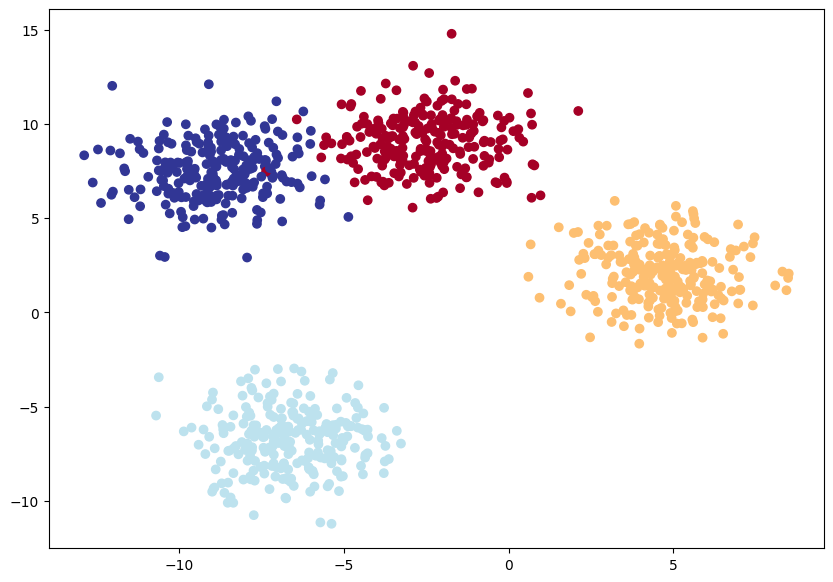

In [53]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [54]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [55]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):

        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [56]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1)

In [57]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


In [58]:
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 2.50166, Acc: 34.25% | Test Loss: 1.12371, Test Acc: 51.00%
Epoch: 10 | Loss: 0.24531, Acc: 94.25% | Test Loss: 0.22234, Test Acc: 97.00%
Epoch: 20 | Loss: 0.10204, Acc: 99.12% | Test Loss: 0.09353, Test Acc: 99.50%
Epoch: 30 | Loss: 0.06880, Acc: 99.12% | Test Loss: 0.06129, Test Acc: 99.50%
Epoch: 40 | Loss: 0.05425, Acc: 99.12% | Test Loss: 0.04672, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04632, Acc: 99.12% | Test Loss: 0.03857, Test Acc: 99.50%
Epoch: 60 | Loss: 0.04140, Acc: 99.12% | Test Loss: 0.03342, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03809, Acc: 99.12% | Test Loss: 0.02989, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03572, Acc: 99.12% | Test Loss: 0.02732, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03395, Acc: 99.12% | Test Loss: 0.02537, Test Acc: 99.50%


9. Pytorch code to implement Alexnet and compare SGD and Adam optimizer

In [59]:
import torch
import torchvision
import torchvision.transforms as transforms


In [60]:
transform = transforms.Compose(
    [transforms.Resize((227,227)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

range_incre = list(range(1, len(trainset), 200))
trainset = torch.utils.data.Subset(trainset, range_incre)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)


testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

range_incre = list(range(1, len(testset), 100))
testset = torch.utils.data.Subset(testset, range_incre)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [61]:
from typing import Any

import torch
from torch import Tensor
from torch import nn

In [62]:
class AlexNet(nn.Module):
    def __init__(self, num_classes: int = 1000) -> None:
        super(AlexNet, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, (11, 11), (4, 4), (2, 2)),
            nn.ReLU(True),
            nn.MaxPool2d((3, 3), (2, 2)),

            nn.Conv2d(64, 192, (5, 5), (1, 1), (2, 2)),
            nn.ReLU(True),
            nn.MaxPool2d((3, 3), (2, 2)),

            nn.Conv2d(192, 384, (3, 3), (1, 1), (1, 1)),
            nn.ReLU(True),
            nn.Conv2d(384, 256, (3, 3), (1, 1), (1, 1)),
            nn.ReLU(True),
            nn.Conv2d(256, 256, (3, 3), (1, 1), (1, 1)),
            nn.ReLU(True),
            nn.MaxPool2d((3, 3), (2, 2)),
        )

        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))

        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Linear(4096, len(classes)),
        )

    def forward(self, x: Tensor) -> Tensor:
        return self._forward_impl(x)

    # Support torch.script function
    def _forward_impl(self, x: Tensor) -> Tensor:
        out = self.features(x)
        out = self.avgpool(out)
        out = torch.flatten(out, 1)
        out = self.classifier(out)

        return out


In [63]:
net = AlexNet(len(classes))
net = net.to(device)

In [64]:
def model_accuracy(test_dl, model):
    total_acc = 0
    batch_num = 0
    for image, label in trainloader:
        image, label = image.to(device), label.to(device)
        with torch.no_grad():
            _, pred = torch.max(net(image), dim=1)
            acc = torch.sum(pred == label).item() / len(pred)
            total_acc += acc
        batch_num += 1

    total_acc /= batch_num
    return(total_acc)


def model_loss(test_dl, model):
    total_loss = 0
    batch_num = 0
    for image, label in testloader:
        image, label = image.to(device), label.to(device)
        with torch.no_grad():
            out = model(image)
            loss = criterion(out, label).item()
            total_loss += loss
        batch_num += 1

    total_loss /= batch_num
    return(total_loss)

In [65]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()


In [66]:
sgd_optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [67]:
def train(optimizer):
  history = list()
  for epoch in range(5):
    epoch_loss = 0
    counter = 0
    for xb, yb in trainloader:
        xb, yb = xb.to(device), yb.to(device)
        out = net(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        epoch_loss += loss
        counter += 1
    epoch_loss /= counter
    history.append({"loss": epoch_loss, "test_acc": model_accuracy(testloader, net), "test_loss": model_loss(testloader, net)})
    print("Epoch {} ended... loss: {}   ...   test_acc: {}   ...   test_loss: {}".format(epoch, history[-1]["loss"], history[-1]["test_acc"], history[-1]["test_loss"]))

In [68]:
print(len(trainset))
print(len(testset))

train_labels = set()
test_labels = set()

for x,y in trainset:
  train_labels.add(y)
for x,y in testset:
  test_labels.add(y)

train_labels , test_labels

250
100


({0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {0, 1, 2, 3, 4, 5, 6, 7, 8, 9})

In [69]:
train(sgd_optimizer)

c:\Users\dhruv\OneDrive\Desktop\Studies\DL Lab\dllabenv\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch 0 ended... loss: 2.303518295288086   ...   test_acc: 0.07985399590163934   ...   test_loss: 2.3018593788146973
Epoch 1 ended... loss: 2.303147554397583   ...   test_acc: 0.07966188524590165   ...   test_loss: 2.302246570587158


KeyboardInterrupt: 

In [ ]:
adam_optimizer = optim.Adam(net.parameters(),lr=0.001)

In [ ]:
train(adam_optimizer)

Epoch 0 ended... loss: 3.275240421295166   ...   test_acc: 0.11577868852459017   ...   test_loss: 2.2980117797851562
Epoch 1 ended... loss: 2.304072380065918   ...   test_acc: 0.10405993852459017   ...   test_loss: 2.2993760108947754
Epoch 2 ended... loss: 2.2991113662719727   ...   test_acc: 0.10405993852459017   ...   test_loss: 2.292092800140381
Epoch 3 ended... loss: 2.2759201526641846   ...   test_acc: 0.14722079918032788   ...   test_loss: 2.4593372344970703
Epoch 4 ended... loss: 2.3565096855163574   ...   test_acc: 0.1247438524590164   ...   test_loss: 2.3099570274353027


10. Object detection using SSD Mdoel in Torch Vision hub

In [ ]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2
# from google.colab.patches import cv2_imshow

In [ ]:
model = torchvision.models.detection.ssd300_vgg16(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model.eval()

SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [ ]:
img = Image.open("dog_image.jpg")

In [ ]:
transform = T.ToTensor()
img = transform(img)

In [ ]:
with torch.no_grad():
    pred = model([img])

In [ ]:
bboxes, scores, labels = pred[0]["boxes"], pred[0]["scores"], pred[0]["labels"]


In [ ]:
num = torch.argwhere(scores > 0.8).shape[0]


In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX


In [ ]:
coco_names = ["person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant", "street sign", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "hat", "backpack", "umbrella", "shoe", "eye glasses", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "plate", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed", "mirror", "dining table", "window", "desk", "toilet", "door", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "blender", "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush", "hair brush"]


In [ ]:
img_cv2 = cv2.imread("dog_image.jpg")


In [ ]:
for i in range(num):
    x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
    img_cv2 = cv2.rectangle(img_cv2, (x1, y1), (x2, y2), (0, 255, 0), 1)
    class_name = coco_names[labels.numpy()[i] - 1]
    img_cv2 = cv2.putText(img_cv2, class_name, (x1, y1 - 10), font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

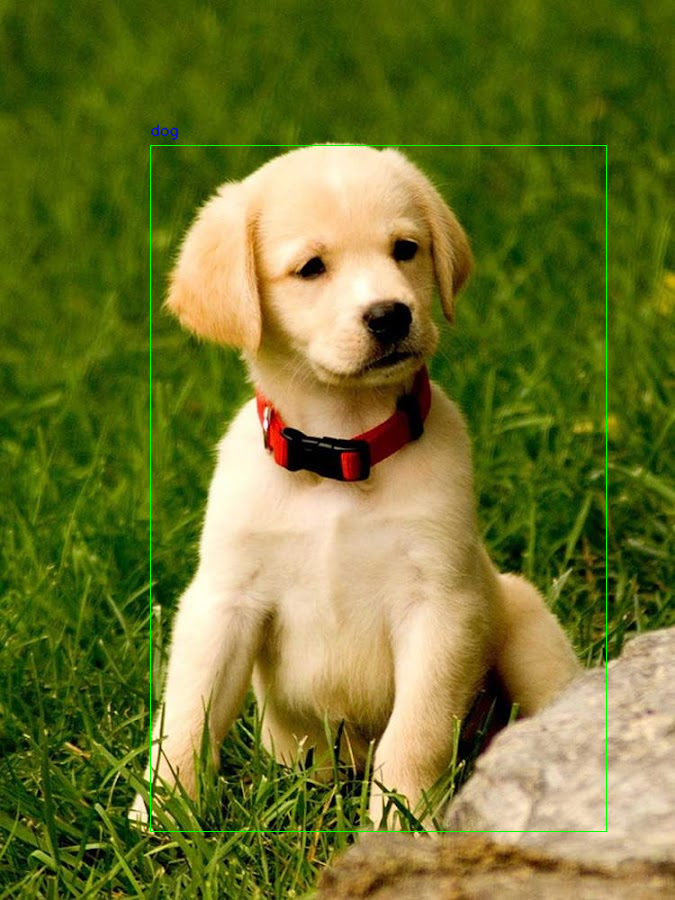

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img_cv2)
cv2.waitKey(0)
cv2.destroyAllWindows()


10. Tensorflow code to implement Text Classification

In [ ]:
# !pip install kaggle

In [ ]:
# from google.colab import files
# files.upload()


In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets download -d hdza1991/sms-spam

In [ ]:
# !unzip sms-spam.zip

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("sms_spam.csv")

In [ ]:
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
mapper = {"ham":0,
          "spam":1}

In [ ]:
df["type"] = df["type"].map(mapper)

In [ ]:
df.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(df["text"].to_numpy(),
                                                                            df["type"].to_numpy(),
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42)

In [ ]:
import keras
import tensorflow as tf
from keras._tf_keras.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [ ]:
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
from tensorflow import keras
from keras._tf_keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")

# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
x = layers.LSTM(64)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [ ]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                      

In [ ]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
157/157 [==============================] - 14s 54ms/step - loss: 0.1690 - accuracy: 0.9436 - val_loss: 0.0742 - val_accuracy: 0.9785
Epoch 2/5
157/157 [==============================] - 2s 15ms/step - loss: 0.0292 - accuracy: 0.9924 - val_loss: 0.0743 - val_accuracy: 0.9767
Epoch 3/5
157/157 [==============================] - 2s 10ms/step - loss: 0.0093 - accuracy: 0.9978 - val_loss: 0.1246 - val_accuracy: 0.9713
Epoch 4/5
157/157 [==============================] - 2s 11ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.1402 - val_accuracy: 0.9767
Epoch 5/5
157/157 [==============================] - 2s 14ms/step - loss: 2.0674e-04 - accuracy: 1.0000 - val_loss: 0.1804 - val_accuracy: 0.9731


11. Write the pytorch code to implement Multi-Head attention mechanism and visualize it.

In [ ]:
import torch
import torch.nn as nn
import math

In [ ]:
class MultiHeadAttentionBlock(nn.Module):

    def __init__(self, d_model: int, h: int, dropout: float) -> None:
        super().__init__()
        self.d_model = d_model # Embedding vector size
        self.h = h # Number of heads
        # Make sure d_model is divisible by h
        assert d_model % h == 0, "d_model is not divisible by h"

        self.d_k = d_model // h # Dimension of vector seen by each head
        self.w_q = nn.Linear(d_model, d_model, bias=False) # Wq
        self.w_k = nn.Linear(d_model, d_model, bias=False) # Wk
        self.w_v = nn.Linear(d_model, d_model, bias=False) # Wv
        self.w_o = nn.Linear(d_model, d_model, bias=False) # Wo
        self.dropout = nn.Dropout(dropout)

    @staticmethod
    def attention(query, key, value, mask, dropout: nn.Dropout):
        d_k = query.shape[-1]
        # Just apply the formula from the paper
        # (batch, h, seq_len, d_k) --> (batch, h, seq_len, seq_len)
        attention_scores = (query @ key.transpose(-2, -1)) / math.sqrt(d_k)
        if mask is not None:
            # Write a very low value (indicating -inf) to the positions where mask == 0
            attention_scores.masked_fill_(mask == 0, -1e9)
        attention_scores = attention_scores.softmax(dim=-1) # (batch, h, seq_len, seq_len) # Apply softmax
        if dropout is not None:
            attention_scores = dropout(attention_scores)
        # (batch, h, seq_len, seq_len) --> (batch, h, seq_len, d_k)
        # return attention scores which can be used for visualization
        return (attention_scores @ value), attention_scores

    def forward(self, q, k, v, mask):
        query = self.w_q(q) # (batch, seq_len, d_model) --> (batch, seq_len, d_model)
        key = self.w_k(k) # (batch, seq_len, d_model) --> (batch, seq_len, d_model)
        value = self.w_v(v) # (batch, seq_len, d_model) --> (batch, seq_len, d_model)

        # (batch, seq_len, d_model) --> (batch, seq_len, h, d_k) --> (batch, h, seq_len, d_k)
        query = query.view(query.shape[0], query.shape[1], self.h, self.d_k).transpose(1, 2)
        key = key.view(key.shape[0], key.shape[1], self.h, self.d_k).transpose(1, 2)
        value = value.view(value.shape[0], value.shape[1], self.h, self.d_k).transpose(1, 2)

        # Calculate attention
        x, self.attention_scores = MultiHeadAttentionBlock.attention(query, key, value, mask, self.dropout)

        # Combine all the heads together
        # (batch, h, seq_len, d_k) --> (batch, seq_len, h, d_k) --> (batch, seq_len, d_model)
        x = x.transpose(1, 2).contiguous().view(x.shape[0], -1, self.h * self.d_k)

        # Multiply by Wo
        # (batch, seq_len, d_model) --> (batch, seq_len, d_model)
        return self.w_o(x)

In [ ]:
attn = MultiHeadAttentionBlock(512,8,0.1)

In [ ]:
x = torch.randn(1,12,512)

In [ ]:
mask = torch.ones_like(torch.randn(1,12))

In [ ]:
mask

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
attn.forward(x,x,x,mask)

tensor([[[ 0.1670, -0.1430,  0.0812,  ..., -0.1424, -0.0180,  0.0296],
         [ 0.1537, -0.0784,  0.1097,  ..., -0.1763,  0.0298, -0.0490],
         [ 0.1690, -0.0178,  0.1350,  ..., -0.2188, -0.0459, -0.1152],
         ...,
         [ 0.1866, -0.0341,  0.1694,  ..., -0.1550,  0.0098,  0.0058],
         [ 0.2851, -0.0395,  0.1008,  ..., -0.0410,  0.0235,  0.0347],
         [ 0.2179,  0.0361,  0.1391,  ..., -0.1292, -0.0407,  0.0071]]],
       grad_fn=<UnsafeViewBackward0>)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def plot_attention(attention, labels=None):

    fig, ax = plt.subplots()
    cax = ax.matshow(attention, cmap='bone')
    fig.colorbar(cax)
    plt.title("Attention score of one head for all input words")

    plt.show()

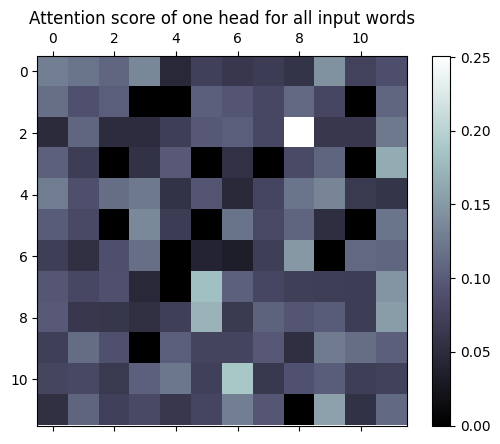

In [ ]:
plot_attention(attn.attention_scores[0][2].detach().numpy())